# PCsales EDA and market basket analysis

## 1. Importing required libraries

In [201]:
#Loading neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 2. Loading the data to pandas dataframe

In [202]:
#Reading Data From Web
df = pd.read_excel(r"C:\Users\Superman\Desktop\PythonMIData\MIData\sample_project\Capstone project\PCPurchaseData.xlsx", sheet_name="Market Basket")
df

,PC Purchase Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Processor,NaN,NaN,Screen Size,NaN,NaN,Memory,NaN,NaN,Hard Drive,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel Core i3,Intel Core i5,Intel Core i7,10 inch screen,12 inch screen,15 inch screen,2 GB,4 GB,8 GB,320 GB,500 GB,750 GB,NaN,NaN,Con
4,0,1,0,0,1,0,0,1,0,0,1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,1,0,0,1,0,0,1,0,0,1,0,NaN,NaN,NaN
68,0,0,1,0,1,0,0,1,0,0,0,1,NaN,NaN,NaN
69,1,0,0,0,1,0,1,1,0,1,0,0,NaN,NaN,NaN
70,1,0,0,0,0,1,0,1,0,1,0,0,NaN,NaN,NaN


## 3. Cleaning the data to meet our requirement

In [203]:
df.columns

Index(['PC Purchase Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [204]:
# Dropping the unnamed columns from 12 to 14

df.drop(['Unnamed: 12','Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)

In [205]:
df.head()

,PC Purchase Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Processor,NaN,NaN,Screen Size,NaN,NaN,Memory,NaN,NaN,Hard Drive,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel Core i3,Intel Core i5,Intel Core i7,10 inch screen,12 inch screen,15 inch screen,2 GB,4 GB,8 GB,320 GB,500 GB,750 GB
4,0,1,0,0,1,0,0,1,0,0,1,0


In [206]:
# Rename columns to our required for analysis

df.rename(columns={'PC Purchase Data':df.iloc[3,0]+"_"+df.iloc[1,0], 'Unnamed: 1':df.iloc[3,1]+"_"+df.iloc[1,0], 'Unnamed: 2':df.iloc[3,2]+"_"+df.iloc[1,0], 'Unnamed: 3':df.iloc[3,3]+"_"+df.iloc[1,3],'Unnamed: 4':df.iloc[3,4]+"_"+df.iloc[1,3], 'Unnamed: 5':df.iloc[3,5]+"_"+df.iloc[1,3], 'Unnamed: 6':df.iloc[3,6]+"_"+df.iloc[1,6], 'Unnamed: 7':df.iloc[3,7]+"_"+df.iloc[1,6], 'Unnamed: 8':df.iloc[3,8]+"_"+df.iloc[1,6],
'Unnamed: 9':df.iloc[3,9]+"_"+df.iloc[1,9], 'Unnamed: 10':df.iloc[3,9]+"_"+df.iloc[1,9], 'Unnamed: 11':df.iloc[3,9]+"_"+df.iloc[1,9]}, inplace=True)


df

,Intel Core i3_Processor,Intel Core i5_Processor,Intel Core i7_Processor,10 inch screen_Screen Size,12 inch screen_Screen Size,15 inch screen_Screen Size,2 GB _Memory,4 GB_Memory,8 GB_Memory,320 GB_Hard Drive,320 GB_Hard Drive,320 GB_Hard Drive
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Processor,NaN,NaN,Screen Size,NaN,NaN,Memory,NaN,NaN,Hard Drive,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Intel Core i3,Intel Core i5,Intel Core i7,10 inch screen,12 inch screen,15 inch screen,2 GB,4 GB,8 GB,320 GB,500 GB,750 GB
4,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,1,0,0,1,0,0,1,0,0,1,0
68,0,0,1,0,1,0,0,1,0,0,0,1
69,1,0,0,0,1,0,1,1,0,1,0,0
70,1,0,0,0,0,1,0,1,0,1,0,0


In [207]:
# Dropping rows which are not required for the analysis 

new_df = df.drop([0,1,2,3,71])
new_df.head()

,Intel Core i3_Processor,Intel Core i5_Processor,Intel Core i7_Processor,10 inch screen_Screen Size,12 inch screen_Screen Size,15 inch screen_Screen Size,2 GB _Memory,4 GB_Memory,8 GB_Memory,320 GB_Hard Drive,320 GB_Hard Drive,320 GB_Hard Drive
4,0,1,0,0,1,0,0,1,0,0,1,0
5,0,1,0,0,0,1,0,0,1,0,0,1
6,0,1,0,0,1,0,0,1,0,1,0,0
7,1,0,0,0,1,0,0,0,1,0,1,0
8,0,0,1,0,0,1,0,0,1,0,0,1


In [208]:
# Resetting index

new_df.reset_index(inplace = True)
new_df.head()

,index,Intel Core i3_Processor,Intel Core i5_Processor,Intel Core i7_Processor,10 inch screen_Screen Size,12 inch screen_Screen Size,15 inch screen_Screen Size,2 GB _Memory,4 GB_Memory,8 GB_Memory,320 GB_Hard Drive,320 GB_Hard Drive,320 GB_Hard Drive
0,4,0,1,0,0,1,0,0,1,0,0,1,0
1,5,0,1,0,0,0,1,0,0,1,0,0,1
2,6,0,1,0,0,1,0,0,1,0,1,0,0
3,7,1,0,0,0,1,0,0,0,1,0,1,0
4,8,0,0,1,0,0,1,0,0,1,0,0,1


In [209]:
final_df = new_df.drop(['index'], axis=1)

In [211]:
# Final data set to work on EDA and analysis

final_df.head()

,Intel Core i3_Processor,Intel Core i5_Processor,Intel Core i7_Processor,10 inch screen_Screen Size,12 inch screen_Screen Size,15 inch screen_Screen Size,2 GB _Memory,4 GB_Memory,8 GB_Memory,320 GB_Hard Drive,320 GB_Hard Drive,320 GB_Hard Drive
0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,0,1


In [213]:
final_df.shape

(67, 12)

In [216]:
final_df.isna().sum()

Intel Core i3_Processor       0
Intel Core i5_Processor       0
Intel Core i7_Processor       0
10 inch screen_Screen Size    0
12 inch screen_Screen Size    0
15 inch screen_Screen Size    0
2 GB _Memory                  0
4 GB_Memory                   0
8 GB_Memory                   0
320 GB_Hard Drive             0
320 GB_Hard Drive             0
320 GB_Hard Drive             0
dtype: int64

In [218]:
final_df.columns

Index(['Intel Core i3_Processor', 'Intel Core i5_Processor',
       'Intel Core i7_Processor', '10 inch screen_Screen Size',
       '12 inch screen_Screen Size', '15 inch screen_Screen Size',
       '2 GB _Memory', '4 GB_Memory', '8 GB_Memory', '320 GB_Hard Drive',
       '320 GB_Hard Drive', '320 GB_Hard Drive'],
      dtype='object')

In [251]:
final_df.shape

(67, 12)

In [252]:
# Removing space in the column values

final_df.columns.str.strip() #removes spaces from beginning and end
final_df.columns

Index(['Intel_Core_i3_Processor', 'Intel_Core_i5_Processor',
       'Intel_Core_i7_Processor', '10_inch_screen_Screen_Size',
       '12_inch_screen_Screen_Size', '15_inch_screen_Screen_Size',
       '2_GB__Memory', '4_GB_Memory', '8_GB_Memory', '320_GB_Hard_Drive',
       '320_GB_Hard_Drive', '320_GB_Hard_Drive'],
      dtype='object')

In [253]:
final_df.head()

,Intel_Core_i3_Processor,Intel_Core_i5_Processor,Intel_Core_i7_Processor,10_inch_screen_Screen_Size,12_inch_screen_Screen_Size,15_inch_screen_Screen_Size,2_GB__Memory,4_GB_Memory,8_GB_Memory,320_GB_Hard_Drive,320_GB_Hard_Drive,320_GB_Hard_Drive
0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,0,1


In [254]:
# Replacing space with _ in the column values

final_df.columns =[s.strip().replace(' ', '_') for s in final_df.columns]
final_df.head()


,Intel_Core_i3_Processor,Intel_Core_i5_Processor,Intel_Core_i7_Processor,10_inch_screen_Screen_Size,12_inch_screen_Screen_Size,15_inch_screen_Screen_Size,2_GB__Memory,4_GB_Memory,8_GB_Memory,320_GB_Hard_Drive,320_GB_Hard_Drive,320_GB_Hard_Drive
0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,0,1


In [267]:
pie = final_df.sum(axis=0)
pie

Intel_Core_i3_Processor       22
Intel_Core_i5_Processor       33
Intel_Core_i7_Processor       12
10_inch_screen_Screen_Size    16
12_inch_screen_Screen_Size    32
15_inch_screen_Screen_Size    19
2_GB__Memory                  17
4_GB_Memory                   38
8_GB_Memory                   13
320_GB_Hard_Drive             19
320_GB_Hard_Drive             31
320_GB_Hard_Drive             17
dtype: object

In [256]:
import pandas as pd

data = { 'Componentname' : ['Intel_Core_i3_Processor', 'Intel_Core_i5_Processor', 'Intel_Core_i7_Processor', '10_inch_screen_Screen_Size','12_inch_screen_Screen_Size','15_inch_screen_Screen_Size', '2_GB__Memory','4_GB_Memory','8_GB_Memory','320_GB_Memory','500_GB_Memory','750_GB_Memory'],
        'Total_sales' : [22,33,12,16,32,19,17,38,13,19,31,17]}

df = pd.DataFrame(data)
print (df)

                 Componentname  Total_sales
0      Intel_Core_i3_Processor           22
1      Intel_Core_i5_Processor           33
2      Intel_Core_i7_Processor           12
3   10_inch_screen_Screen_Size           16
4   12_inch_screen_Screen_Size           32
5   15_inch_screen_Screen_Size           19
6                 2_GB__Memory           17
7                  4_GB_Memory           38
8                  8_GB_Memory           13
9                320_GB_Memory           19
10               500_GB_Memory           31
11               750_GB_Memory           17


## 4. EDA of the data

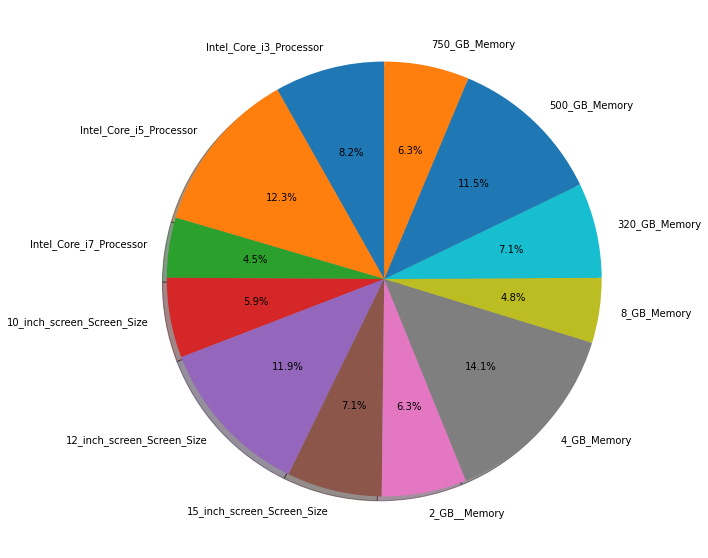

In [257]:
fig, ax = plt.subplots(figsize=(10,10))

y = df['Total_sales']
mylabels = df['Componentname']

plt.pie(y, labels = mylabels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

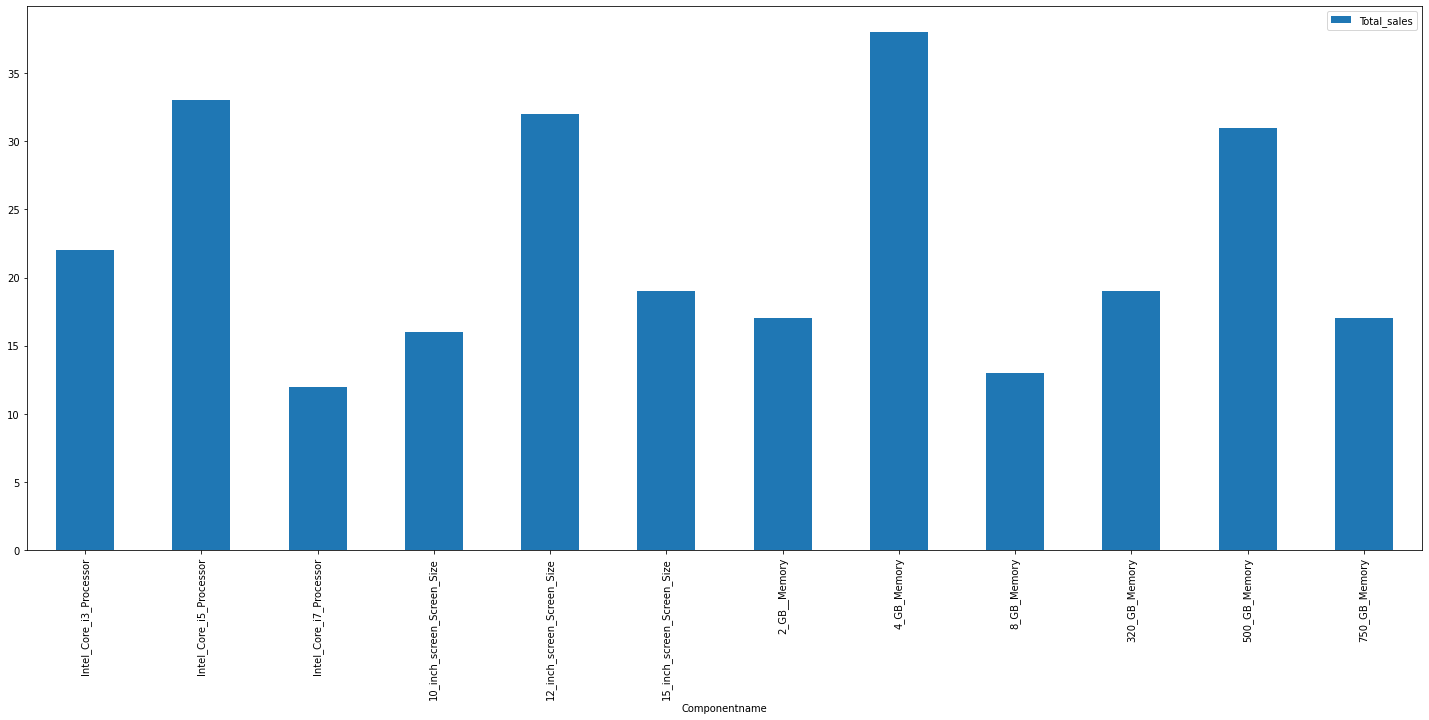

In [258]:
df.plot(x='Componentname', y='Total_sales', kind = 'bar',figsize=(25,10));

# Training Model

In [259]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(final_df, min_support=0.07, use_colnames=True)

# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [268]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [270]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Intel_Core_i3_Processor),(10_inch_screen_Screen_Size),0.328358,0.238806,0.134328,0.409091,1.713068,0.055914,1.288175
1,(10_inch_screen_Screen_Size),(Intel_Core_i3_Processor),0.238806,0.328358,0.134328,0.562500,1.713068,0.055914,1.535181
2,(Intel_Core_i3_Processor),(12_inch_screen_Screen_Size),0.328358,0.477612,0.164179,0.500000,1.046875,0.007351,1.044776
3,(12_inch_screen_Screen_Size),(Intel_Core_i3_Processor),0.477612,0.328358,0.164179,0.343750,1.046875,0.007351,1.023454
4,(Intel_Core_i3_Processor),(2_GB__Memory),0.328358,0.253731,0.104478,0.318182,1.254011,0.021163,1.094527
...,...,...,...,...,...,...,...,...,...
95,(Intel_Core_i7_Processor),"(4_GB_Memory, 12_inch_screen_Screen_Size)",0.179104,0.268657,0.074627,0.416667,1.550926,0.026509,1.253731
96,(12_inch_screen_Screen_Size),"(Intel_Core_i7_Processor, 4_GB_Memory)",0.477612,0.089552,0.074627,0.156250,1.744792,0.031856,1.079049
97,(4_GB_Memory),"(Intel_Core_i7_Processor, 12_inch_screen_Scree...",0.567164,0.104478,0.074627,0.131579,1.259398,0.015371,1.031208
98,"(Intel_Core_i7_Processor, 15_inch_screen_Scree...",(320_GB_Hard_Drive),0.074627,0.253731,0.074627,1.000000,3.941176,0.055692,inf


In [281]:
my_rules.count()

antecedents           144
consequents           144
antecedent support    144
consequent support    144
support               144
confidence            144
lift                  144
leverage              144
conviction            144
dtype: int64

* Support: Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database

* Lift: The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. 

* Confidence: The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent.

* Leverage: Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. A leverage value of 0 indicates independence.

* Conviction: A high conviction value means that the consequent is highly depending on the antecedent.

In [272]:
my_rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,0.270730,0.270730,0.099917,0.461039,1.862454,0.036729,inf
std,0.143122,0.143122,0.037163,0.234545,0.784977,0.026449,NaN
min,0.074627,0.074627,0.074627,0.131579,1.015152,0.001114,1.002665
25%,0.149254,0.149254,0.074627,0.294118,1.229052,0.016151,1.084060
50%,0.253731,0.253731,0.089552,0.411765,1.536827,0.031410,1.231876
75%,0.328358,0.328358,0.104478,0.625000,2.364706,0.051905,1.585821
max,0.567164,0.567164,0.283582,1.285714,3.941176,0.158610,inf


## 5. Making recommendations

In [262]:
final_df.head()

,Intel_Core_i3_Processor,Intel_Core_i5_Processor,Intel_Core_i7_Processor,10_inch_screen_Screen_Size,12_inch_screen_Screen_Size,15_inch_screen_Screen_Size,2_GB__Memory,4_GB_Memory,8_GB_Memory,320_GB_Hard_Drive,320_GB_Hard_Drive,320_GB_Hard_Drive
0,0,1,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,0,1


In [280]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 2) &
       (my_rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(320_GB_Hard_Drive),(Intel_Core_i5_Processor),0.253731,0.492537,0.283582,1.117647,2.269162,0.158610,inf
13,(Intel_Core_i5_Processor),(320_GB_Hard_Drive),0.492537,0.253731,0.283582,0.575758,2.269162,0.158610,1.759062
19,(Intel_Core_i7_Processor),(8_GB_Memory),0.179104,0.194030,0.089552,0.500000,2.576923,0.054801,1.611940
20,(Intel_Core_i7_Processor),(320_GB_Hard_Drive),0.179104,0.253731,0.119403,0.666667,2.627451,0.073959,2.238806
34,(320_GB_Hard_Drive),(2_GB__Memory),0.253731,0.253731,0.134328,0.529412,2.086505,0.069949,1.585821
35,(2_GB__Memory),(320_GB_Hard_Drive),0.253731,0.253731,0.134328,0.529412,2.086505,0.069949,1.585821
36,(8_GB_Memory),(320_GB_Hard_Drive),0.194030,0.253731,0.104478,0.538462,2.122172,0.055246,1.616915
50,"(320_GB_Hard_Drive, 4_GB_Memory)",(Intel_Core_i3_Processor),0.104478,0.328358,0.074627,0.714286,2.175325,0.040321,2.350746
66,"(320_GB_Hard_Drive, 12_inch_screen_Screen_Size)",(Intel_Core_i5_Processor),0.119403,0.492537,0.149254,1.250000,2.537879,0.090443,inf
68,"(12_inch_screen_Screen_Size, Intel_Core_i5_Pro...",(320_GB_Hard_Drive),0.208955,0.253731,0.149254,0.714286,2.815126,0.096235,2.611940


## 6. Building network model

* Visual representation to map the network for the above interconnection of components

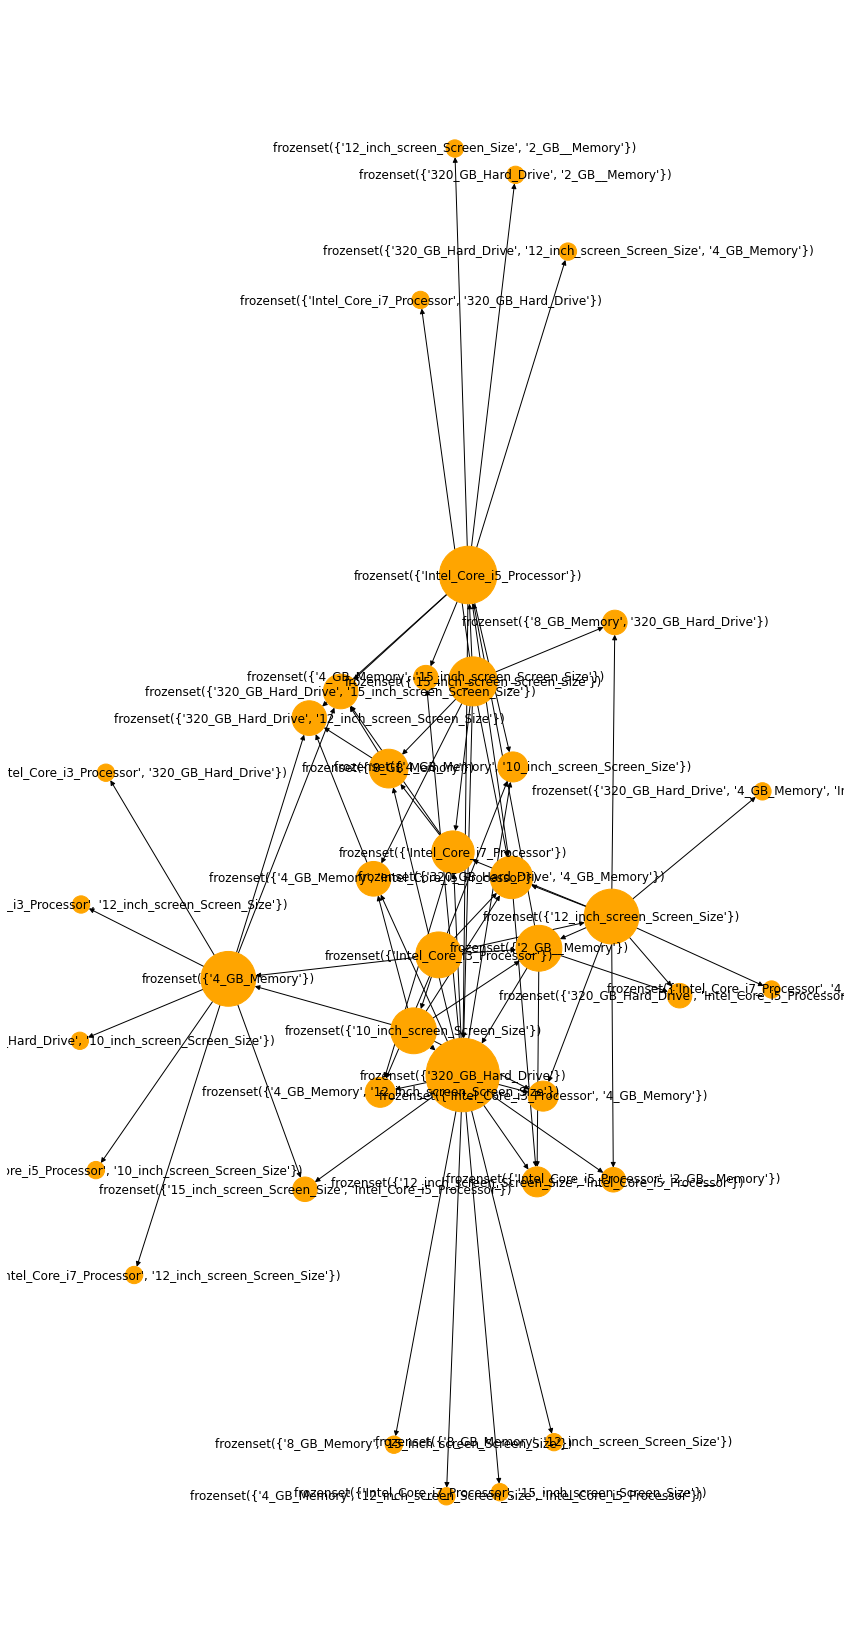

In [278]:

from mlxtend.preprocessing import TransactionEncoder
from matplotlib.pyplot import figure, text
import networkx as nx

fig, ax=plt.subplots(figsize=(15,30),squeeze=False)
d = dict(G.degree)
G=nx.from_pandas_edgelist(my_rules,source='antecedents',target='consequents')
pos = nx.spring_layout(G)
nx.draw(G,pos=pos, node_color='orange',arrows=True, with_labels=True,node_size=[d[k]*300 for k in d])
plt.show()